In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import P201_Functions as p201

In [41]:
# Reads the name of the csv file and get the data
df = pd.read_csv("./CapstoneData.csv")

# Prints information about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time (s) Run #1                  330 non-null    float64
 1   State Run #1                     330 non-null    float64
 2   Block Event Times (s) Run #1     165 non-null    float64
 3   Period (s) Run #1                82 non-null     float64
 4   Block-to-Block Times (s) Run #1  164 non-null    float64
 5   Speed (m/s) Run #1               165 non-null    float64
 6   Time in Gate (s) Run #1          165 non-null    float64
 7   Time (s) Run #2                  660 non-null    float64
 8   State Run #2                     660 non-null    float64
 9   Block Event Times (s) Run #2     330 non-null    float64
 10  Period (s) Run #2                164 non-null    float64
 11  Block-to-Block Times (s) Run #2  329 non-null    float64
 12  Speed (m/s) Run #2    

<Axes: xlabel='Time (s) Run #2', ylabel='Period (s) Run #2'>

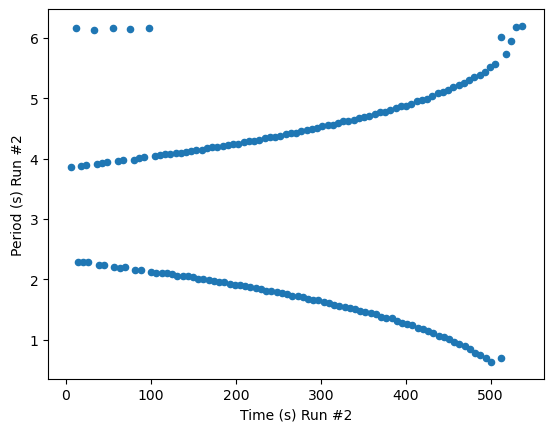

In [42]:
# Drop columns other than the useful ones (time and period)
df2=df.drop(['Time (s) Run #1', 'State Run #1','Block Event Times (s) Run #1', 'Period (s) Run #1', 'Block-to-Block Times (s) Run #1', 'Speed (m/s) Run #1','Time in Gate (s) Run #1'],axis=1)

# Filter the data to remove rows without good period values (i.e. not NaN)
#df3=df2[df2['Period (s) Run #2']<100.0]
df3=df2

df3.plot(y='Period (s) Run #2',x='Time (s) Run #2',kind='scatter')

# Some trickery to get the time and period into 1D numpy arrays for plotting/fitting purposes.
#conv_arr= df3.values

#xi = np.delete(conv_arr,[2],axis=1) 
#yi = np.delete(conv_arr,[0],axis=1)
#xi = xi.ravel()
#yi = yi.ravel()


# add error bars on the time and period (1/2 smallest division in data)
#sigmax = [0.0005 for i in range(len(xi))]
#sigmai = [0.005 for i in range(len(xi))]

In [43]:
traw = np.array(df3['Time (s) Run #2'])

print(traw)

periods = []
times = []
tstart = traw[0]
for i in range(1,len(traw)):
    print(i, traw[i], tstart)
    if (traw[i] - tstart) > 6.0:
        period = traw[i] - tstart
        periods.append(period)
        times.append(tstart)
        tstart = traw[i]
        print('Period:', period)
        
xi = np.array(times)
yi = np.array(periods)

# add error bars on the time and period (1/2 smallest division in data)
sigmax = [0.0005 for i in range(len(xi))]
sigmai = [0.005 for i in range(len(xi))]

[  1.669   1.68    1.683   1.694   5.526   5.541   7.83    7.853  11.688
  11.701  11.714  11.728  13.973  13.987  14.005  14.017  17.856  17.869
  17.885  17.899  20.131  20.146  20.163  20.175  24.031  24.042  24.045
  24.057  26.308  26.327  30.2    30.225  32.453  32.467  32.478  32.491
  36.364  36.378  36.394  36.409  38.605  38.62   38.639  38.652  42.535
  42.549  42.564  42.579  44.769  44.783  44.794  44.807  48.709  48.73
  50.939  50.962  54.875  54.889  54.9    54.915  57.078  57.094  57.113
  57.127  61.042  61.056  61.074  61.09   63.235  63.251  63.272  63.286
  67.214  67.228  67.237  67.252  69.41   69.439  73.386  73.412  75.563
  75.578  75.586  75.599  79.547  79.562  79.58   79.597  81.708  81.725
  81.746  81.761  85.717  85.733  85.751  85.768  87.869  87.886  87.903
  87.917  91.893  91.922  94.043  94.07   98.06   98.074  98.083  98.099
 100.183 100.2   100.218 100.233 104.225 104.241 104.261 104.279 106.335
 106.353 106.376 106.391 110.397 110.412 110.427 110

In [44]:
df3.info()
df3.head()

print(xi)
print(yi)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time (s) Run #2                  660 non-null    float64
 1   State Run #2                     660 non-null    float64
 2   Block Event Times (s) Run #2     330 non-null    float64
 3   Period (s) Run #2                164 non-null    float64
 4   Block-to-Block Times (s) Run #2  329 non-null    float64
 5   Speed (m/s) Run #2               330 non-null    float64
 6   Time in Gate (s) Run #2          330 non-null    float64
dtypes: float64(7)
memory usage: 36.2 KB
[  1.669   7.83   13.973  20.131  26.308  32.453  38.605  44.769  50.939
  57.078  63.235  69.41   75.563  81.708  87.869  94.043 100.183 106.335
 112.504 118.664 124.804 130.961 137.135 143.28  149.427 155.59  161.756
 167.893 174.046 180.215 186.366 192.508 198.668 204.836 210.974 217.123
 223.

Constant Fit: Coefficients (from curve_fit)
[6.1501954]
Constant Fit: Covariance Matrix (from curve_fit)
[[2.87356321e-07]]

Constant Fit: Final Result: y = (6.15020 +/- 0.00054)



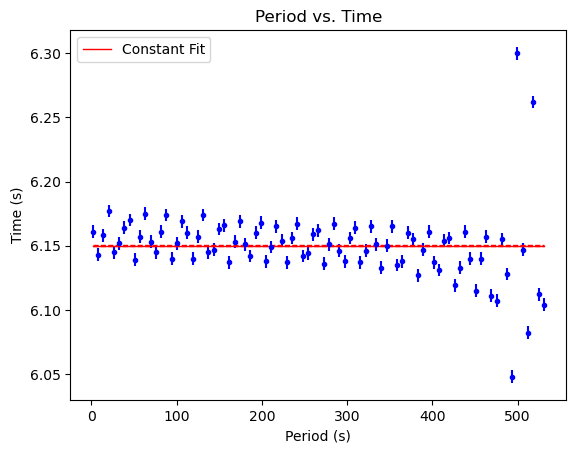

In [45]:
# Plot the data, with error bars, and add appropriate labels
plt.errorbar(xi,yi,sigmai,sigmax,'b.')

plt.ylabel('Time (s)')
plt.xlabel('Period (s)')
plt.title('Period vs. Time')

# Takes the x and y values, with errors in y, and make a constant fit.  The last two parameters are
# the x_low and x_high range to fit over!  This first one is for the entire range.
intercept, dintercept = p201.constant_fit_plot_errors(xi,yi,sigmai,plt,0.0,800.0)

# Adds the legend to the plot
plt.legend()

# Displays the plot
plt.show()



Constant Fit: Coefficients (from curve_fit)
[6.15061404]
Constant Fit: Covariance Matrix (from curve_fit)
[[4.38596492e-07]]

Constant Fit: Final Result: y = (6.15061 +/- 0.00066)



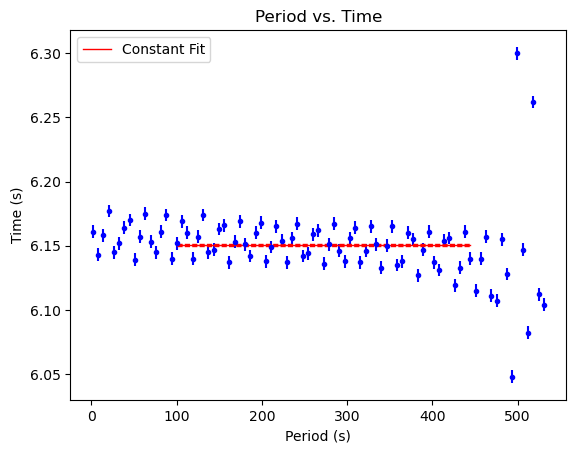

In [47]:
# Same as the previous cell, but with a reduced range of times, to remove the first 100 seconds
# from the fit.

plt.errorbar(xi,yi,sigmai,sigmax,'b.')

plt.ylabel('Time (s)')
plt.xlabel('Period (s)')
plt.title('Period vs. Time')

# Takes the x and y values to make a trendline
intercept2, dintercept2 = p201.constant_fit_plot_errors(xi,yi,sigmai,plt,100.0,450.0)

# Adds the legend to the plot
plt.legend()

# Displays the plot
plt.show()

Linear Fit: Coefficients (from curve_fit)
[ 6.16217747e+00 -4.24391645e-05]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 3.61818052e-06 -1.16694438e-08]
 [-1.16694438e-08  4.28282182e-11]]

Linear Fit: Final Result: y = (-0.00004 +/- 0.00001) x + (6.16218 +/- 0.00190)



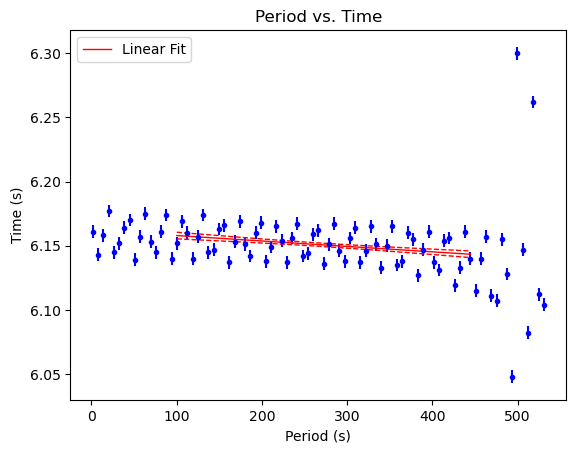

In [48]:
# Same as the previous cell, but with a linear fit, instead of a constant fit.

plt.errorbar(xi,yi,sigmai,sigmax,'b.')

plt.ylabel('Time (s)')
plt.xlabel('Period (s)')
plt.title('Period vs. Time')

# Takes the x and y values to make a trendline
intercept3, slope3, dintercept3, dslope3 = p201.linear_fit_plot_errors(xi,yi,sigmai,plt,100.0,450.0)

# Adds the legend to the plot
plt.legend()

# Displays the plot
plt.show()